In [1]:
import matplotlib.pyplot as plt
import chess.pgn

In [2]:
def count_value_(board, color):
    val = 0
    val += len(board.pieces(color=color, piece_type=chess.PAWN))
    val += len(board.pieces(color=color, piece_type=chess.KNIGHT))*3
    val += len(board.pieces(color=color, piece_type=chess.BISHOP))*3
    val += len(board.pieces(color=color, piece_type=chess.ROOK))*5
    val += len(board.pieces(color=color, piece_type=chess.QUEEN))*9

    return val

nombre de points 53230
accuracy: 0.6686642870561713


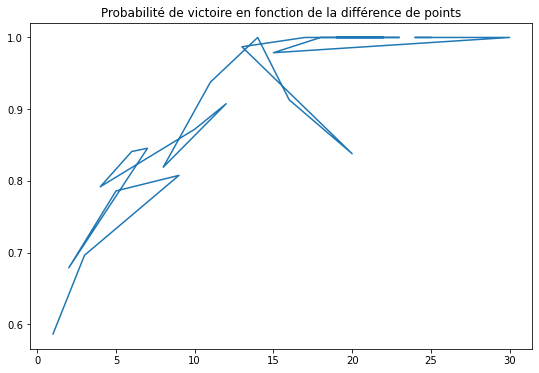

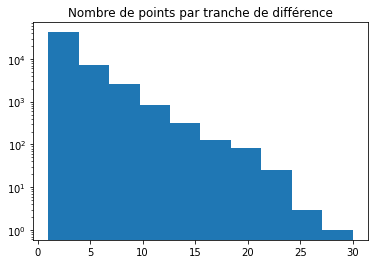

Wall time: 12 s


In [4]:
%%time
diffs = []
xs = []

pgn = open("../../data/lichess_elite_2020-06.pgn")

good_pred = {}
tt_pred = {}
good = 0
values_count = 0

for i in range(1500):
    game = chess.pgn.read_game(pgn)
    if game.headers["Result"] == "1/2-1/2":
        continue
    winner = 1 if game.headers["Result"] == "1-0" else 2
    board = game.board()
    counter = 0
    for move in game.mainline_moves():
        board.push(move)
        counter+=1

        white_value = count_value_(board, chess.WHITE)
        black_value = count_value_(board, chess.BLACK)
        #white_value = count_value(board.__str__(), values_w)
        #black_value = count_value(board.__str__(), values_b)
        diff = abs(white_value - black_value)
        if diff != 0:
            diffs.append(diff)
            xs.append(counter)

            if white_value > black_value and winner == 1:
                good_pred[diff] = good_pred[diff]+1 if diff in good_pred else 1
                good+=1
            elif white_value < black_value and winner == 2:
                good_pred[diff] = good_pred[diff]+1 if diff in good_pred else 1
                good+=1
            
            tt_pred[diff] = tt_pred[diff]+1 if diff in tt_pred else 1
            values_count += 1

keys = [key for key in tt_pred]
vals = [good_pred.get(key, 0) / tt_pred[key] for key in tt_pred]

print("nombre de points", values_count)
print("accuracy:", good/values_count)
plt.figure(figsize=(9,6))
plt.title("Probabilité de victoire en fonction de la différence de points")
plt.plot(keys, vals, "o")
plt.show()

plt.title("Nombre de points par tranche de différence")
plt.hist(diffs)
plt.yscale('log')
plt.show()

In [5]:
from scipy import signal
import numpy as np

recorded = [[1, 2], [3, 4]]
filter = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]
recovered, remainder = signal.deconvolve(np.matrix(recorded), np.matrix(filter))
print(recovered, remainder)

[] [[1 2]
 [3 4]]
